In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [50]:
data = []
data.append(pd.read_csv('data/data1.txt', sep='\t', header=None).values)
data.append(pd.read_csv('data/data2.txt', sep='\t', header=None).values)
data.append(pd.read_csv('data/data3.txt', sep='\t', header=None).values)
data.append(pd.read_csv('data/data4.txt', sep='\t', header=None).values)
data = np.array(data)

In [75]:
data
data[idx][:,0]

array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])

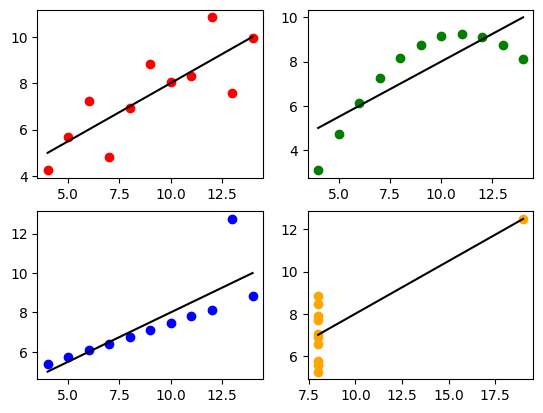

In [82]:
color_list = ['red', 'green', 'blue', 'orange']

fig, axes = plt.subplots(2,2)
for idx, axis in enumerate(axes.flatten()):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[idx][:,0], data[idx][:,1])
    
    axis.plot(data[idx][:,0], data[idx][:,1], 'o', color=color_list[idx]);
    line = np.arange(np.min(data[idx][:,0]), np.max(data[idx][:,0]) + 0.5, 0.5)
    axis.plot(line, line * slope + intercept, color="black")

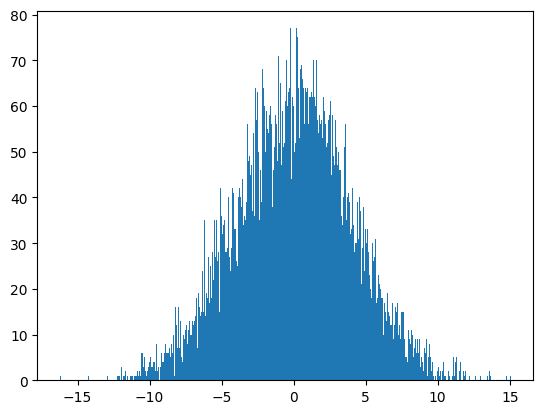

In [93]:
data2 = np.random.standard_normal(10000) * 4

plt.hist(data2, bins=500);

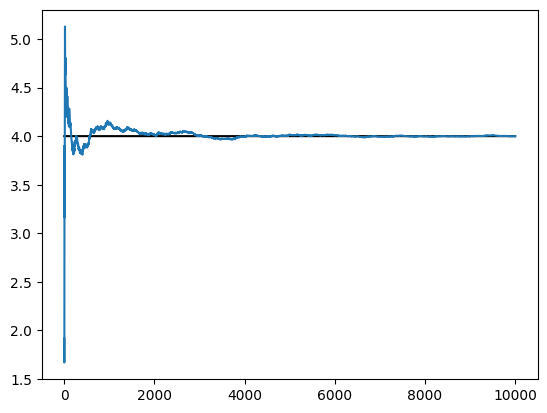

In [120]:
x = np.arange(1,10001)
y = pd.DataFrame(data2).expanding().std()

plt.plot(x, [4]*len(x), color="black")
plt.plot(x, y);

